<a href="https://colab.research.google.com/github/Erajjamil137/Machine-learning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outliers detected at indices (KMeans): []


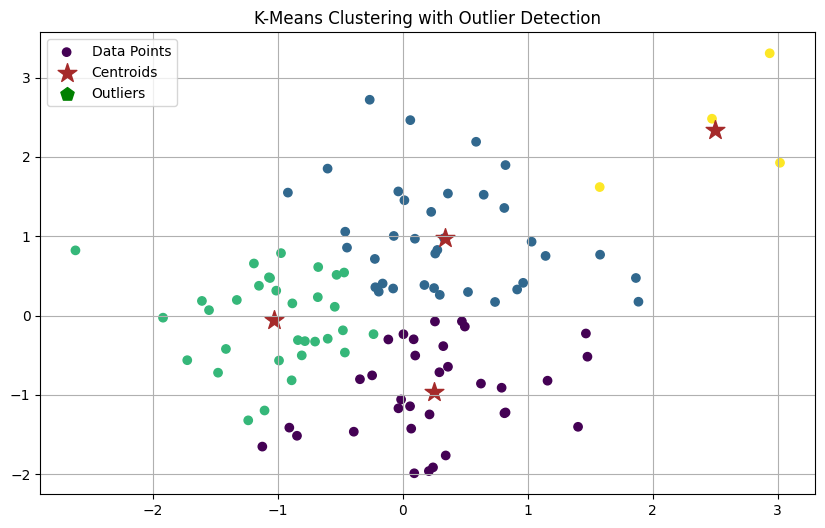

Outliers detected at indices (DBSCAN): [  0  13  14  22  27  57  83  85  92  94 106 114 131 135 150 151 152 153
 154 155 156 157 158 159]


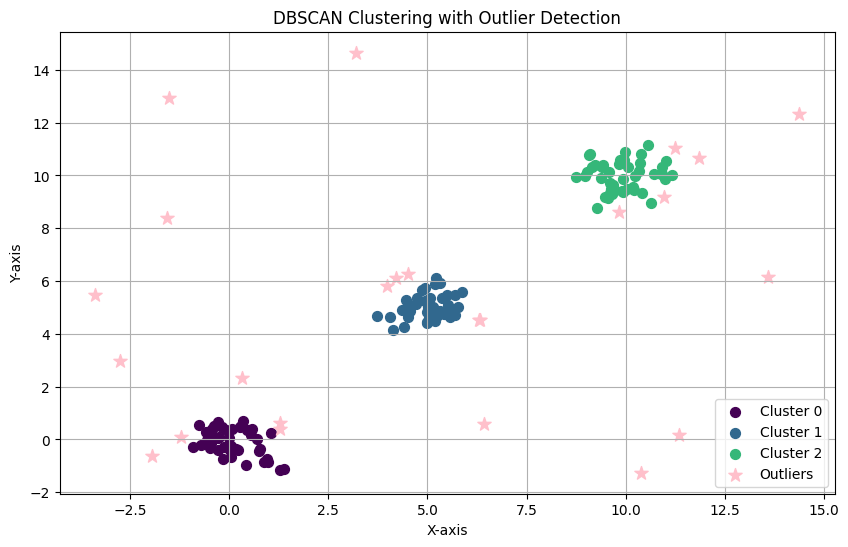

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Setting a random seed for reproducibility
np.random.seed(42)

# ------------------ K-Means Clustering ------------------
# Generating data with some outliers
X = np.random.normal(loc=0, scale=1, size=(100, 2))
outliers = np.random.uniform(low=-4, high=4, size=(5, 2))
X = np.concatenate([X, outliers])

# Applying KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Calculating distances to the nearest cluster center
distances = kmeans.transform(X).min(axis=1)
threshold = 2  # Distance threshold for outlier detection
outliers_index = np.where(distances > threshold)[0]
print("Outliers detected at indices (KMeans):", outliers_index)

# Plotting K-Means results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='brown', marker='*', label='Centroids')
plt.scatter(X[outliers_index, 0], X[outliers_index, 1], s=100, c='green', marker='p', label='Outliers')
plt.title('K-Means Clustering with Outlier Detection')
plt.legend()
plt.grid()
plt.show()

# ------------------ DBSCAN Clustering ------------------
# Generating data for DBSCAN with a broader range and clusters
X_dbscan = np.concatenate([
    np.random.normal(loc=0, scale=0.6, size=(50, 2)),
    np.random.normal(loc=5, scale=0.6, size=(50, 2)),
    np.random.normal(loc=10, scale=0.6, size=(50, 2)),
    np.random.uniform(low=-5, high=15, size=(10, 2))
])

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_dbscan)

# Identifying outliers
outliers_index_dbscan = np.where(labels_dbscan == -1)[0]
print("Outliers detected at indices (DBSCAN):", outliers_index_dbscan)

# Plotting DBSCAN results
plt.figure(figsize=(10, 6))
unique_labels = set(labels_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Outliers
        plt.scatter(X_dbscan[outliers_index_dbscan, 0], X_dbscan[outliers_index_dbscan, 1],
                    s=100, c='pink', marker='*', label='Outliers')
    else:
        # Clusters
        plt.scatter(X_dbscan[labels_dbscan == label, 0], X_dbscan[labels_dbscan == label, 1],
                    s=50, color=color, marker='o', label=f'Cluster {label}')

plt.title('DBSCAN Clustering with Outlier Detection')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()
